## Classification data

In [54]:
from fri import genClassificationData
X,y = genClassificationData(n_samples=200, n_features=20,n_strel=4, n_redundant=8,
                    n_repeated=0, flip_y=0,random_state=2,partition=[4,4])

Generating dataset with d=20,n=200,strongly=4,weakly=8, partition of weakly=[4, 4]


In [55]:
X.shape

(200, 20)

We created a binary classification set with 6 features of which 2 are strongly relevant and 2 weakly relevant.

Scale Data

In [56]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

New object for Classification Data

In [57]:
from fri import FRIClassification
fri = FRIClassification(parallel=True)

Fit to data

In [58]:
fri.fit(X_scaled,y)

Print out feature relevance intervals

In [59]:
fri.interval_*fri.optim_L1_

array([[ 2.10340381,  2.27073083],
       [ 0.68540619,  0.87764958],
       [ 2.49664983,  2.65014194],
       [ 2.1089928 ,  2.23879733],
       [ 0.        ,  1.88637514],
       [ 0.        ,  1.88637514],
       [ 0.        ,  1.88637514],
       [ 0.        ,  1.88637514],
       [ 0.        ,  1.96624079],
       [ 0.        ,  1.96624079],
       [ 0.        ,  1.96624079],
       [ 0.        ,  1.96624079],
       [ 0.        ,  0.04916114],
       [ 0.        ,  0.07530817],
       [ 0.        ,  0.15237736],
       [ 0.        ,  0.10045339],
       [ 0.        ,  0.11056738],
       [ 0.        ,  0.16713404],
       [ 0.        ,  0.09086267],
       [ 0.        ,  0.11367916]])

### Plot results

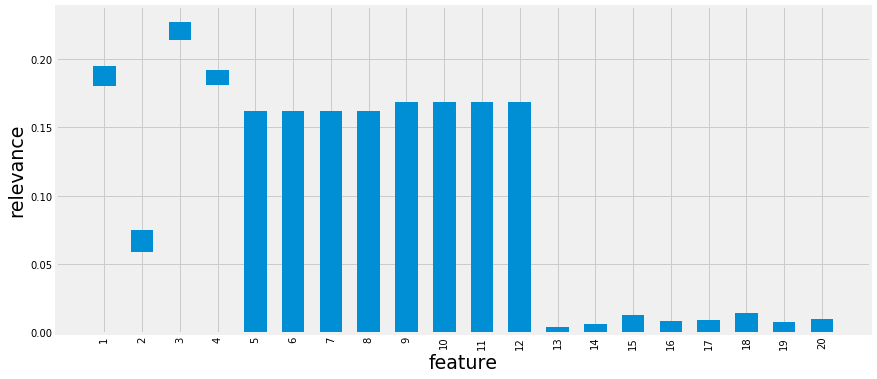

In [60]:
from fri import plot
%matplotlib inline
p = plot.plotIntervals(fri.interval_)

In [61]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [62]:
clust, link = fri.community_detection2(X_scaled,y)

In [63]:
from fri import plot_dendrogram_and_intervals

In [64]:
def plotbars(bars,names,X,di):
    d = X.shape[1]
    n_bars =len(bars)
    
    xticks = np.arange(d)
    width = 0.2
    plt.figure(figsize=(8,5))
    plt.title("Dimension {}".format(di))
    
    def plotbar(bar1,name,i):
        if bar1.ndim>1:
            upper_vals = bar1[:, 1]
            lower_vals = bar1[:, 0]
        else:
            upper_vals = bar1
            lower_vals = np.zeros(d) 
        height = upper_vals - lower_vals
        height[height < 0.004] =  0.004
        plt.bar(xticks+i*width,height,width,lower_vals,label=name)
        
    for bar,name,i in zip(bars,names,range(n_bars)):
        plotbar(bar,name,i)

    plt.axvline(x=di-width/2,linestyle="--")
    plt.axvline(x=di+n_bars*width-0.5*width,linestyle="--")
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

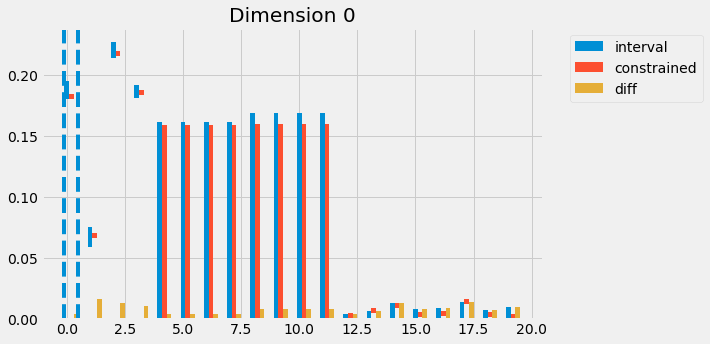

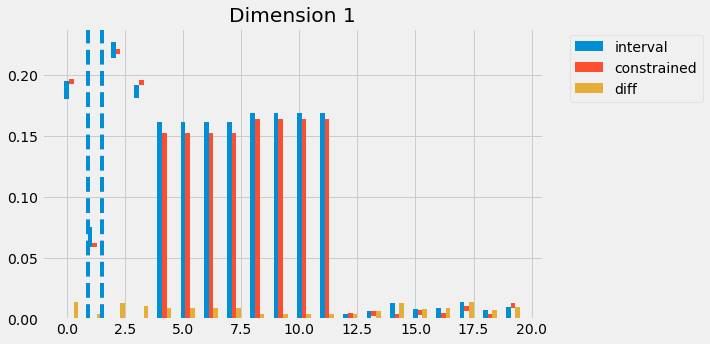

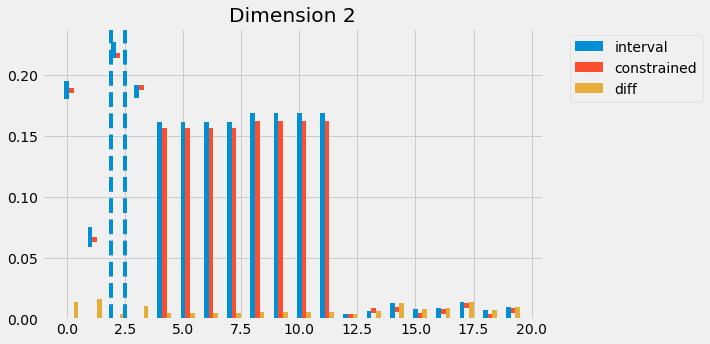

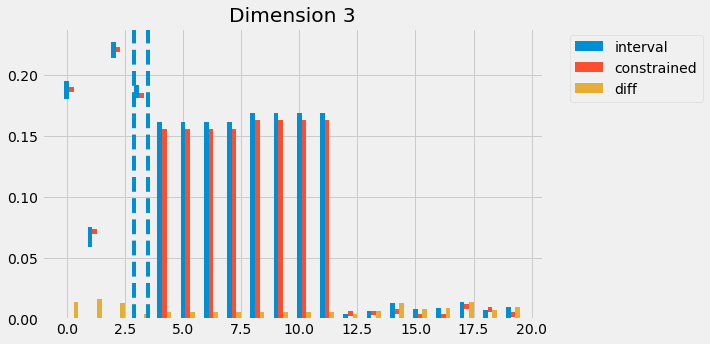

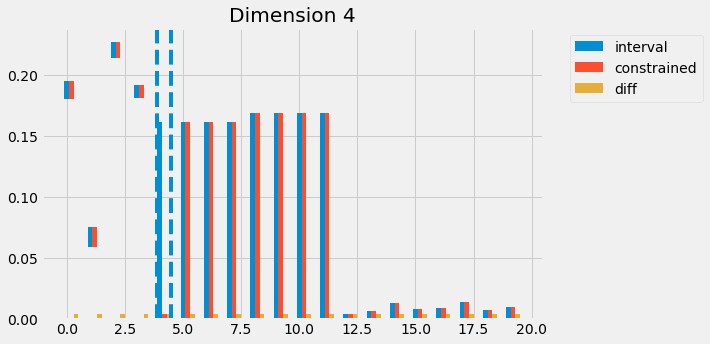

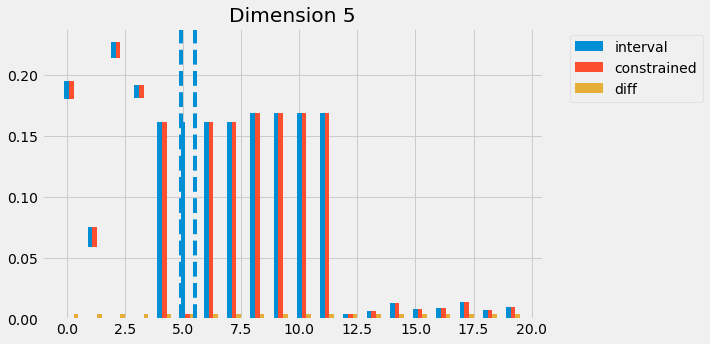

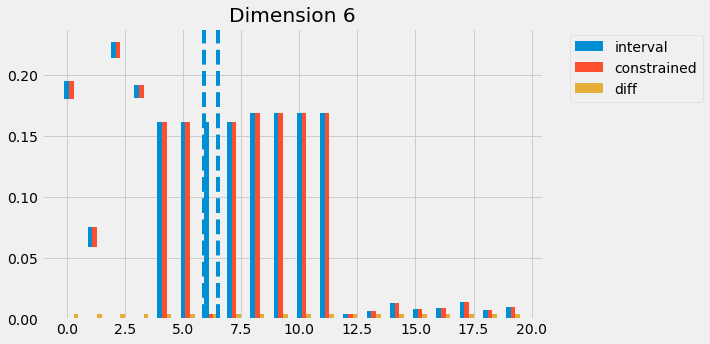

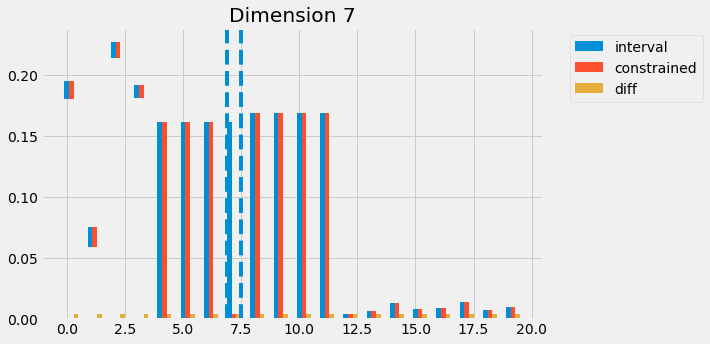

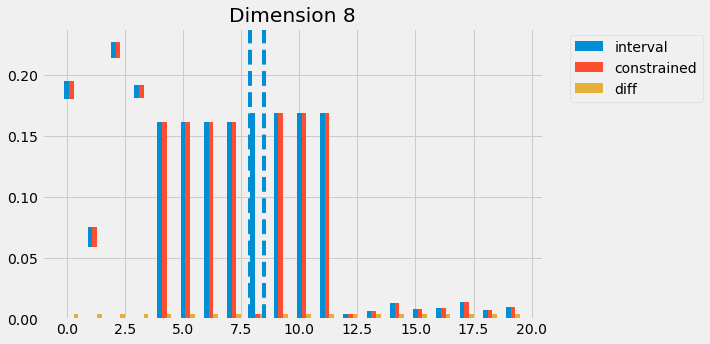

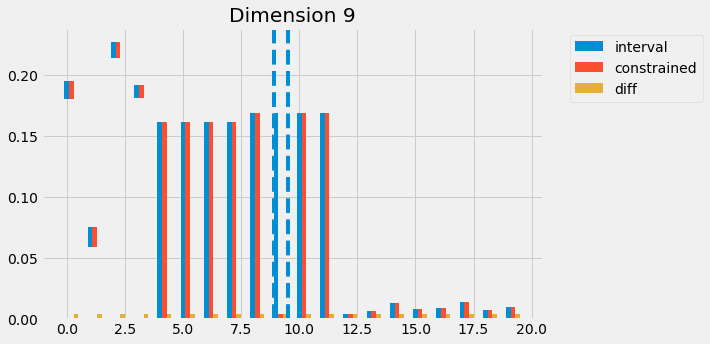

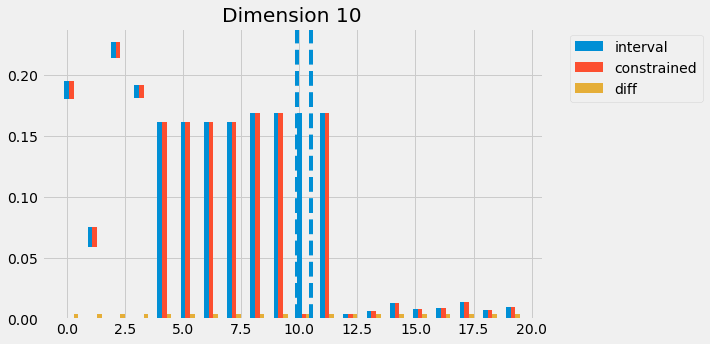

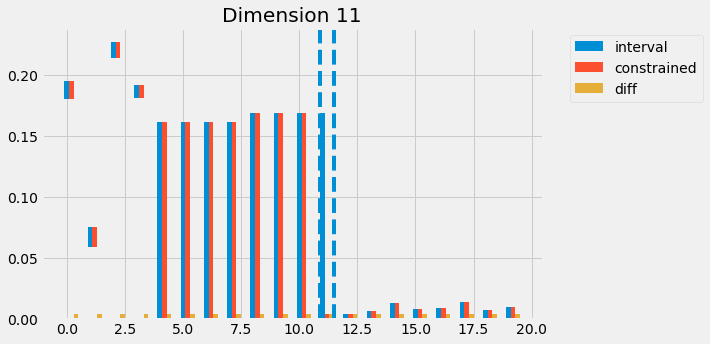

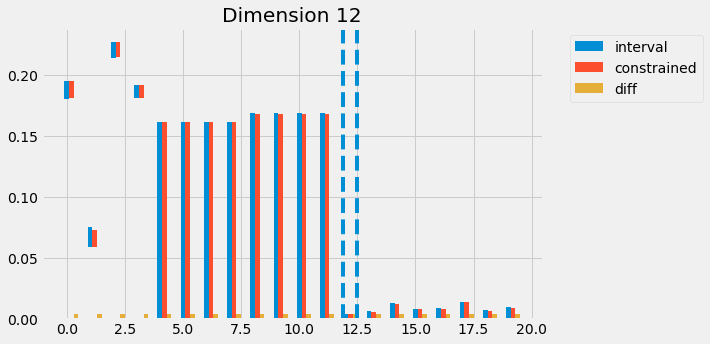

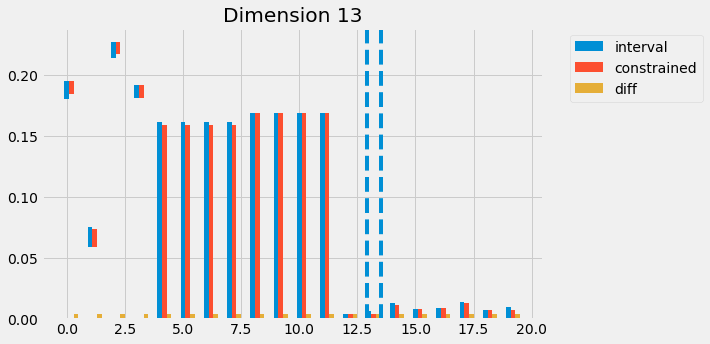

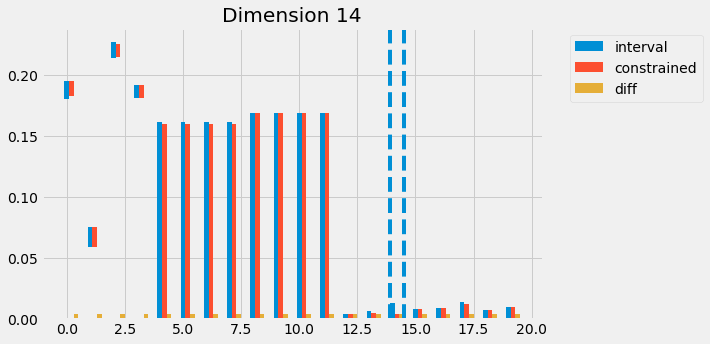

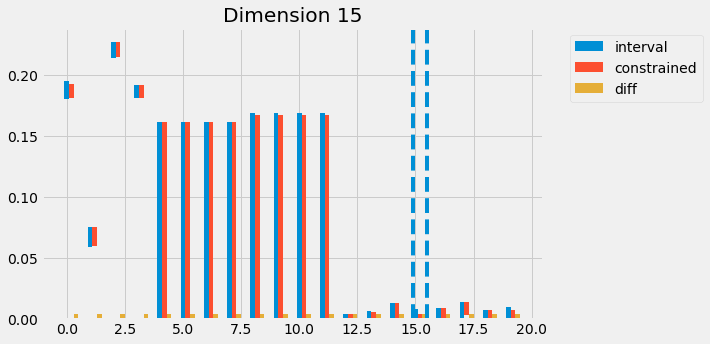

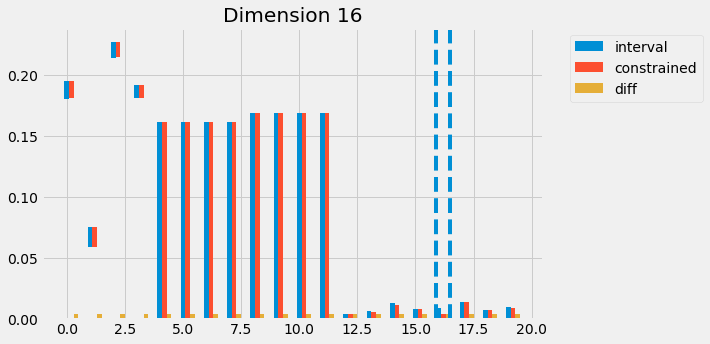

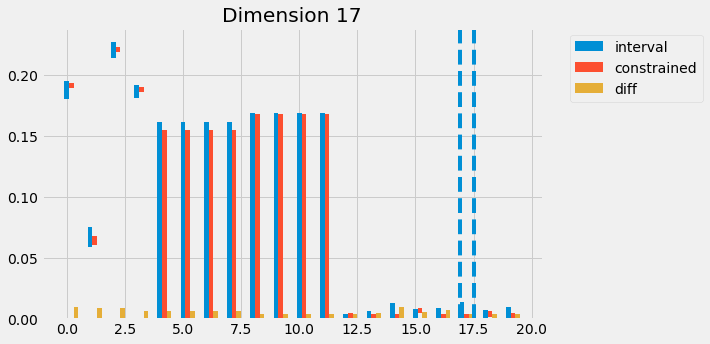

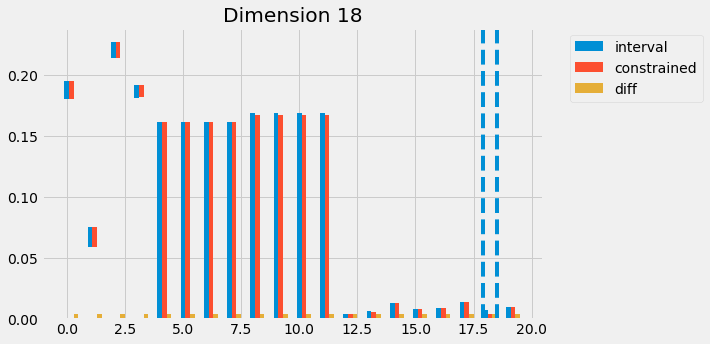

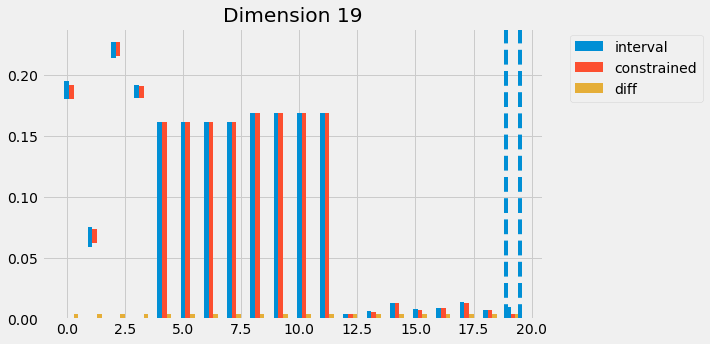

In [65]:
for d in range(X.shape[1]):
    ints = fri.interval_
    conr = fri.constrained_ranges_min
    condiff = fri.constrained_ranges_diff_min[d]
    plotbars([ints,conr[d],condiff],["interval","constrained","diff"],X,d)

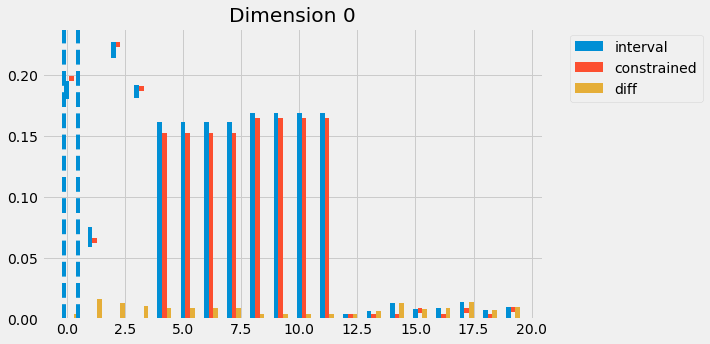

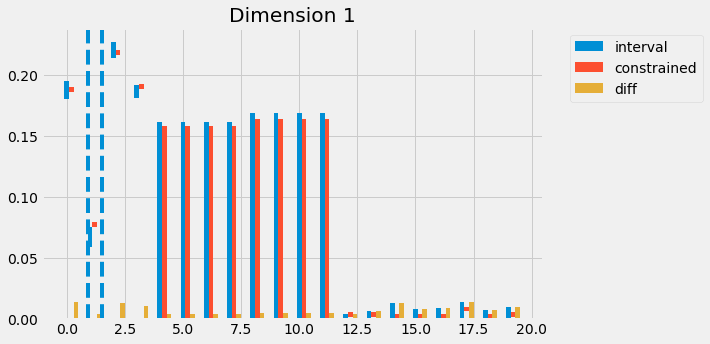

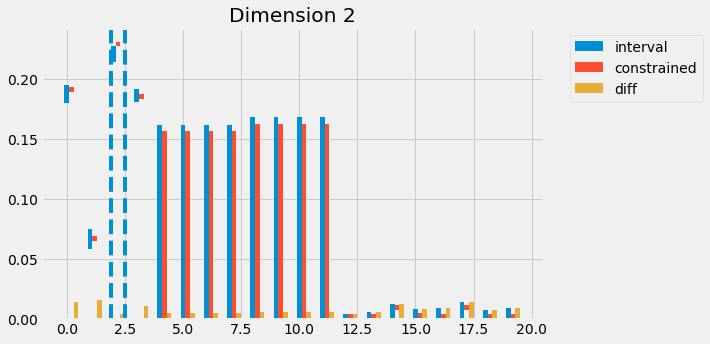

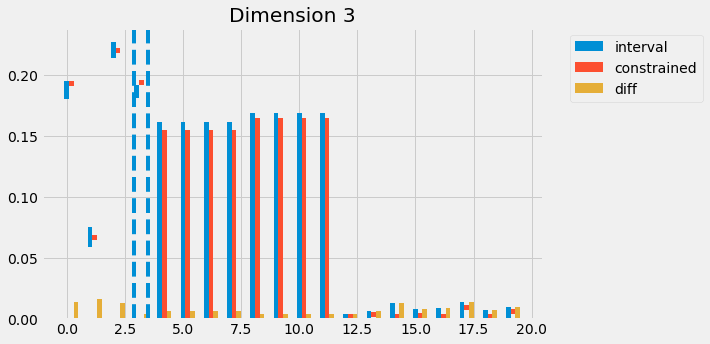

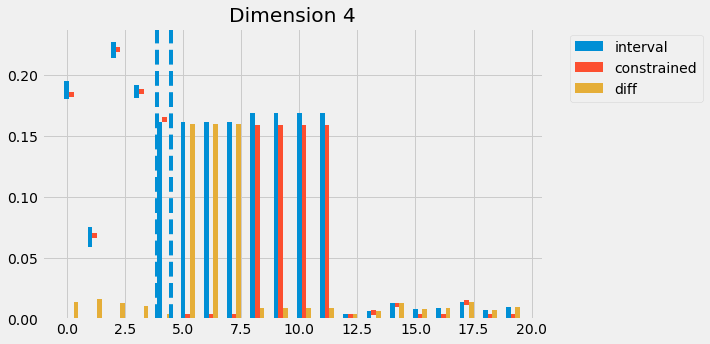

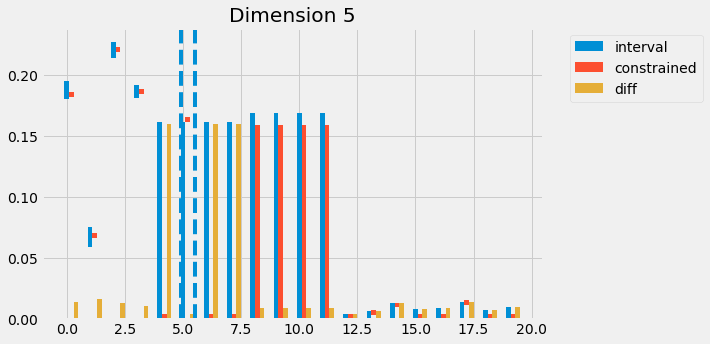

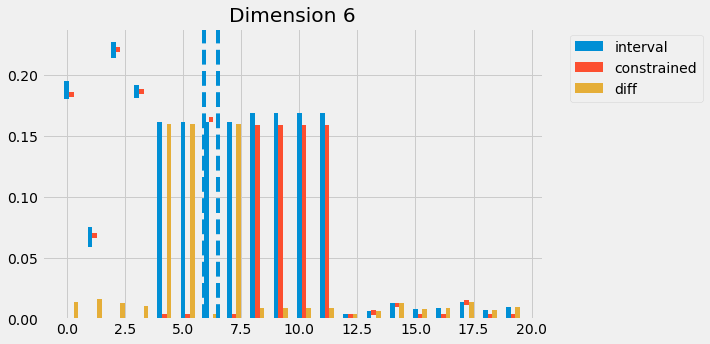

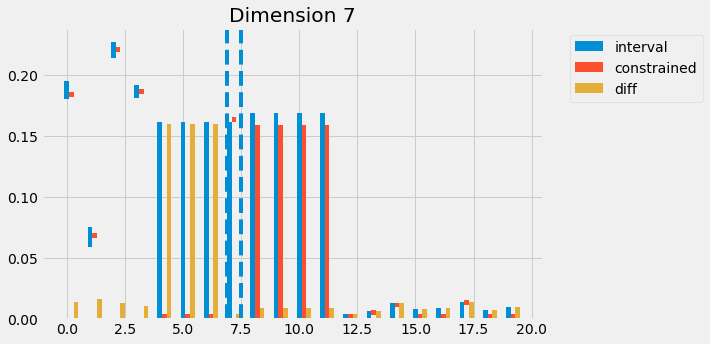

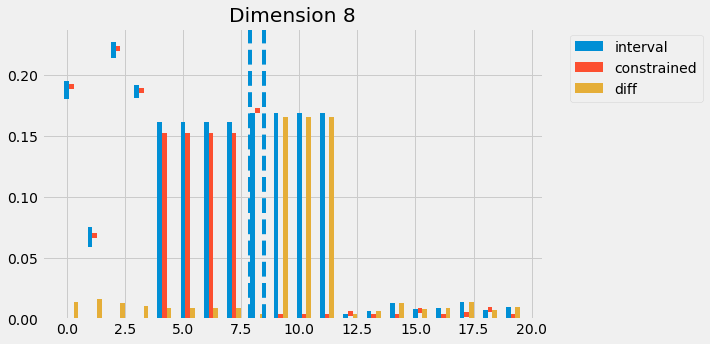

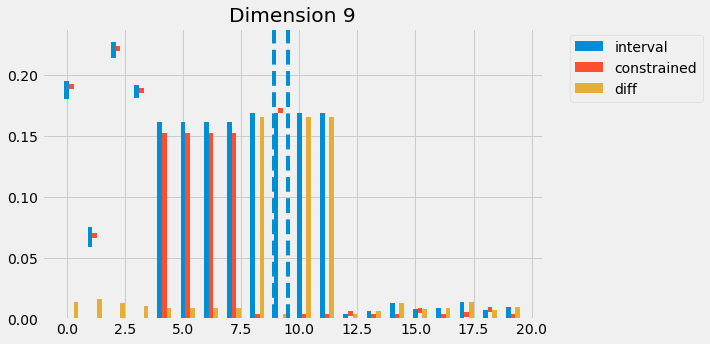

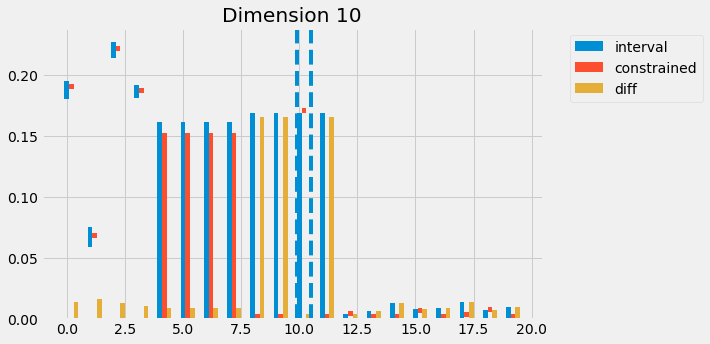

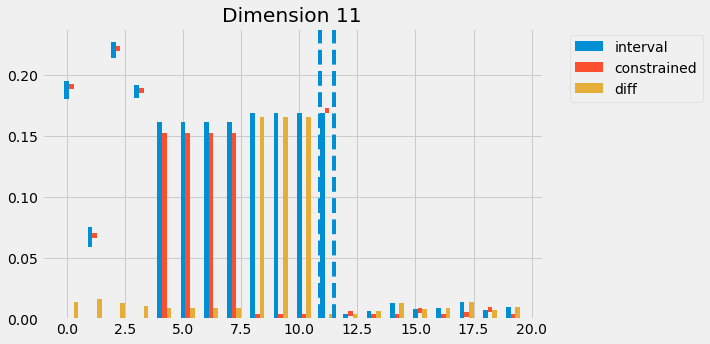

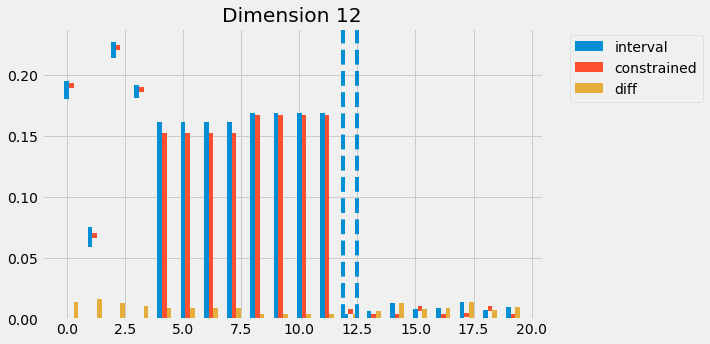

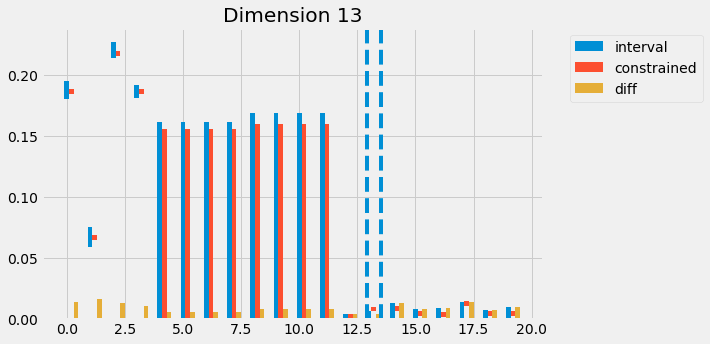

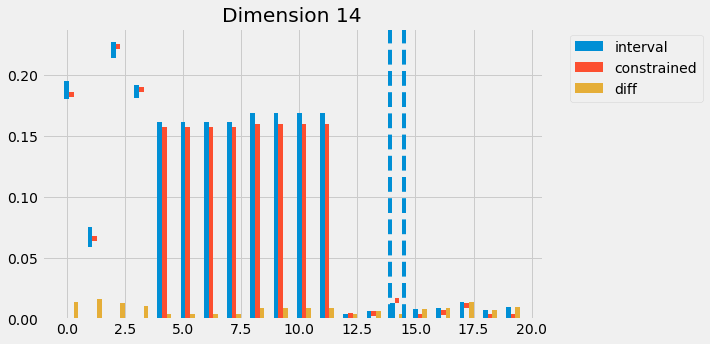

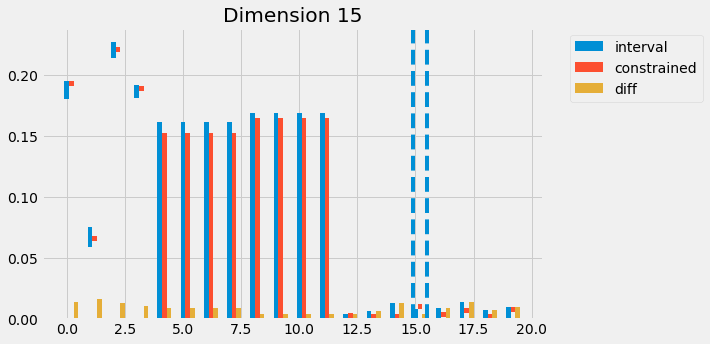

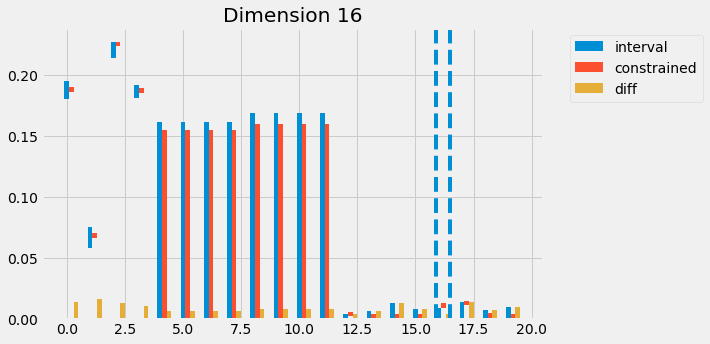

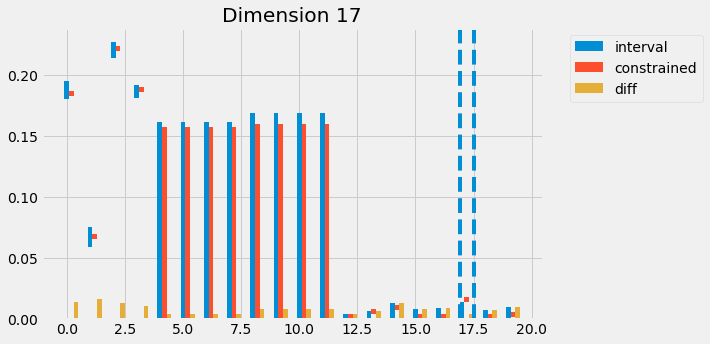

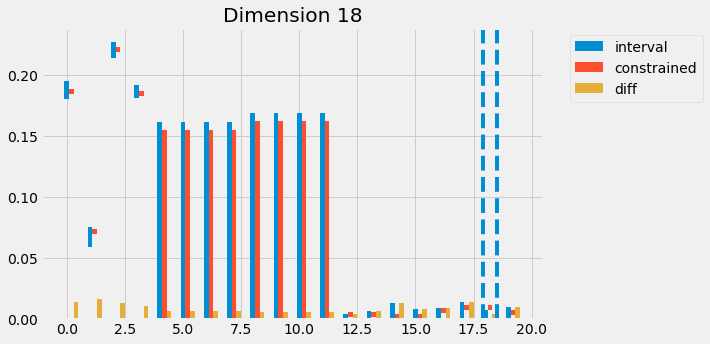

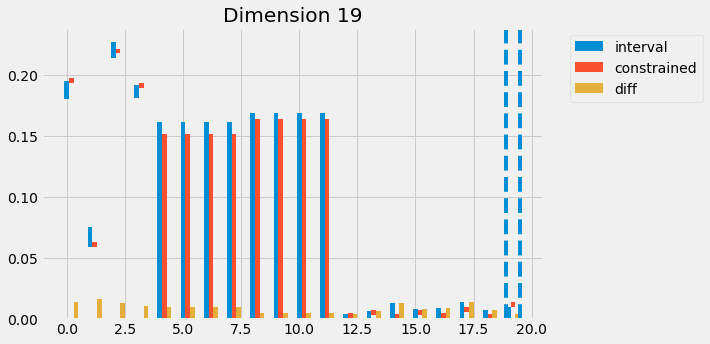

In [66]:

for d in range(X.shape[1]):
    ints = fri.interval_
    conr = fri.constrained_ranges_max
    condiff = fri.constrained_ranges_diff_max[d]
    plotbars([ints,conr[d],condiff],["interval","constrained","diff"],X,d)


In [67]:
import seaborn as sns

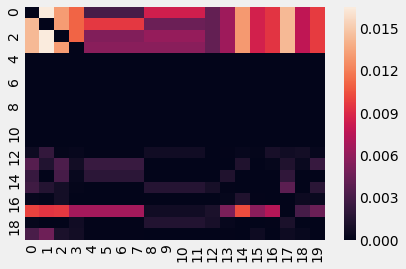

In [68]:
sns.heatmap(fri.constrained_ranges_diff_min)

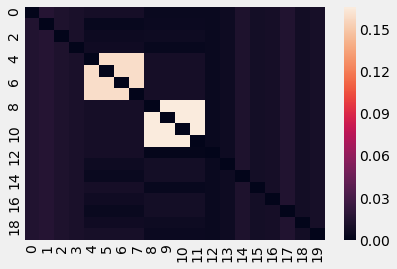

In [69]:
sns.heatmap(fri.constrained_ranges_diff_max)

In [70]:
sumofdiff = fri.constrained_ranges_diff_min + fri.constrained_ranges_diff_max

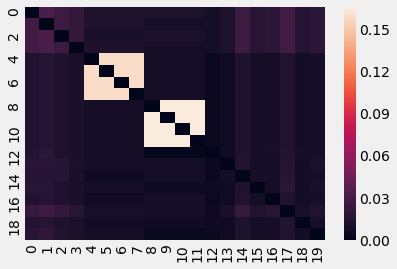

In [71]:
sns.heatmap(sumofdiff)

In [72]:
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import squareform

In [83]:
a = fri.constrained_ranges_diff_max
a = sumofdiff
# add up lower triangular matrix to upper one
collapsed_variation = np.triu(a) + np.tril(a).T
np.fill_diagonal(collapsed_variation, 0)

# Create distance matrix
dist_mat = np.triu(collapsed_variation).T + collapsed_variation
# normalize and convert distance to similarities
dist_mat = 1 - dist_mat / np.max(dist_mat)
# feature with itself has no distance
np.fill_diagonal(dist_mat, 0)
# convert to squareform for scipy compat.
dist_mat_square = squareform(dist_mat)

# Execute clustering
link = linkage(dist_mat_square, method="ward")

# Set cutoff at which threshold the linkage gets flattened (clustering)
RATIO = 0.55
threshold = RATIO * np.max(link[:, 2])  # max of branch lengths (distances)

feature_clustering = fcluster(link, threshold, criterion="distance")

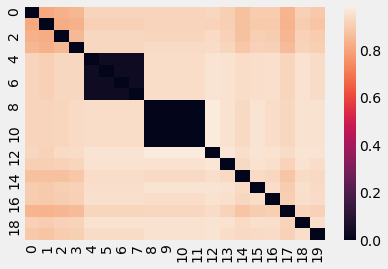

In [84]:
sns.heatmap(dist_mat)

In [85]:
link = linkage(dist_mat_square, method="ward")

In [86]:
fcluster(link, threshold, criterion="distance")

array([3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

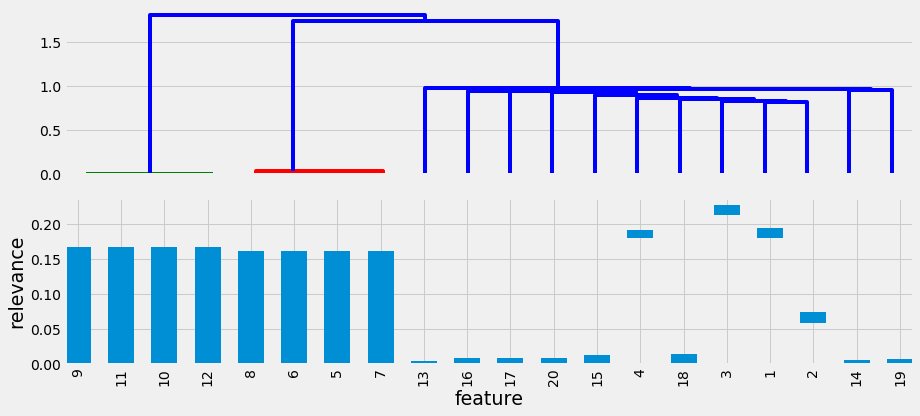

In [87]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

In [89]:
clust, link = fri.community_detection()

In [91]:
clust

array([3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

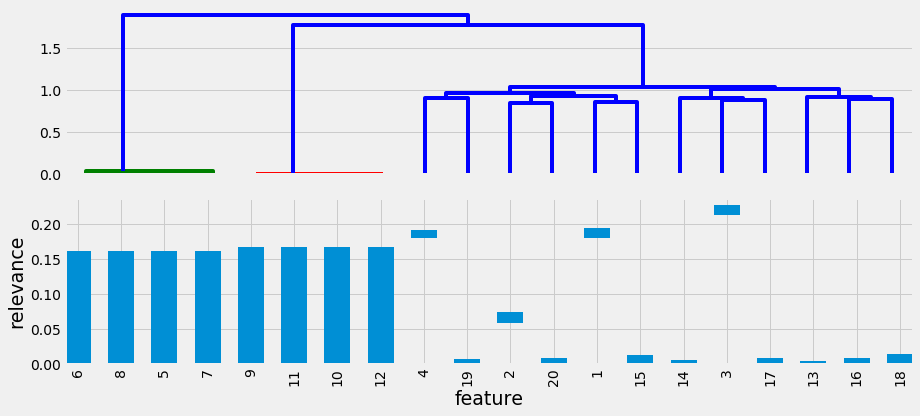

In [90]:
p = plot_dendrogram_and_intervals(fri.interval_,link)